# Problem Definition

The datathon results should contain predictions for each ATM for each day and should be provided in csv format consisting of three columns:

* CASHPOINTID - unique identifier of ATM for which the prediction is made;
* OPERATIONDATE - date (must be in [2020-01-01 - 2020-01-31] period) for which the prediction is made;
* AMT_SCALED - predicted total daily withdrawal amount (scaled)

Participants will be asked for the repository in which they built the forecasting model.

After submitting the results, participants are expected to explain their approach, extracted insights and model.



Work done will be evaluated according to the following criteria:

* OOS (Out of Sample) error metrics;
* Ability to communicate the results;
* Code quality and implementability.


# Imports

In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')

# Read Data

* CASHPOINTID - unique identifier of ATM for which the prediction is made;
* OPERATIONDATE - date (must be in [2020-01-01 - 2020-01-31] period) for which the prediction is made;
* AMT_SCALED - predicted total daily withdrawal amount (scaled)

In [3]:
dataset = pd.read_csv('data/train.csv')

In [4]:
dataset.head()

,CASHPOINTID,OPERATIONDATE,AMT_SCALED
0,0,2017-01-01 00:00:00,0.027997
1,1,2017-01-01 00:00:00,0.014108
2,2,2017-01-01 00:00:00,0.009077
3,3,2017-01-01 00:00:00,0.002922
4,4,2017-01-01 00:00:00,0.004330


In [5]:
dataset.columns = ['id', 'date', 'amt']

# EDA

## count unique id

In [6]:
dataset.id.unique().shape

(1343,)

In [7]:
dataset.id.describe()

count    1.137633e+06
mean     5.432787e+02
std      3.485384e+02
min      0.000000e+00
25%      2.550000e+02
50%      5.070000e+02
75%      7.750000e+02
max      1.342000e+03
Name: id, dtype: float64

## date range

In [8]:
dataset.date = pd.to_datetime(dataset.date)

In [9]:
dataset.date.describe()

count                        1137633
unique                        139796
top              2017-12-29 00:00:00
freq                            1079
first            2017-01-01 00:00:00
last      2019-12-31 19:25:45.250000
Name: date, dtype: object

Start date is `2017-01-01` and end date is `2019-12-31`

## aggregate values for each date

In [10]:
dataset = dataset.set_index('date')

In [11]:
df = dataset.groupby('id').resample('D')[['amt']].sum().reset_index(level='id')

### Store dataset

In [12]:
# df.to_csv('data/train_aggregated_by_day.csv')

### Load Dataset

In [13]:
# df = pd.read_csv('data/train_aggregated_by_day.csv')
# df.date = pd.to_datetime(df.date)
# df.set_index('date', inplace=True)

## Describe values for each ATM

We get values more than 1 after aggragation by day.

In [14]:
df.groupby('id').describe()

amt                                                              \
       count      mean       std       min       25%       50%       75%   
id                                                                         
0     1095.0  0.114241  0.073290  0.000000  0.083210  0.108530  0.132027   
1     1095.0  0.237327  0.146536  0.000000  0.159795  0.210586  0.272701   
2     1095.0  0.030930  0.047359  0.000000  0.012635  0.024289  0.037713   
3     1095.0  0.049970  0.050079  0.000000  0.024230  0.041619  0.063676   
4     1095.0  0.141011  0.095581  0.000000  0.096303  0.127962  0.167921   
5     1095.0  0.194068  0.101083  0.000000  0.144915  0.183287  0.231681   
6     1095.0  0.109018  0.116845  0.000000  0.057747  0.089840  0.131040   
7     1095.0  0.085489  0.081456  0.000000  0.039722  0.066745  0.105951   
8     1095.0  0.078619  0.085017  0.000000  0.041387  0.062138  0.093709   
9     1095.0  0.149803  0.123346  0.000000  0.075444  0.121396  0.190834   
10      61.0  0.188231  0.231239  0.000000  0.051865  0.156323  0.223594   
11    1095.0  0.025174  0.062564  0.000000  0.004031  0.010391  0.020846   
12    1095.0  0.207552  0.128295  0.000000  0.140130  0.190111  0.245482   
13    1095.0  0.059928  0.061049  0.000000  0.035495  0.050259  0.068007   
14    1095.0  0.087686  0.077637  0.000000  0.051836  0.079654  0.106297   
15    1094.0  0.058324  0.068347  0.000000  0.029838  0.049772  0.071725   
16    1095.0  0.145663  0.096624  0.000000  0.096839  0.135384  0.175375   
17    1095.0  0.046014  0.089427  0.000000  0.007607  0.018487  0.045358   
18    1095.0  0.162972  0.117324  0.000000  0.105790  0.140884  0.192934   
19    1095.0  0.103398  0.107677  0.000000  0.053734  0.096113  0.133999   
20    1095.0  0.144927  0.110531  0.000000  0.086133  0.130718  0.177506   
21    1095.0  0.049716  0.081931  0.000000  0.013569  0.031388  0.053393   
22    1095.0  0.088720  0.083776  0.000000  0.051688  0.075744  0.101201   
23    1095.0  0.020597  0.063706  0.000000  0.000106  0.003402  0.014671   
24     608.0  0.107305  0.110803  0.000000  0.052264  0.079127  0.126310   
25    1095.0  0.098127  0.083851  0.000000  0.047058  0.086278  0.133595   
26    1095.0  0.107339  0.106446  0.000000  0.057621  0.097156  0.137456   
27    1095.0  0.137779  0.136348  0.000000  0.086365  0.115107  0.149689   
28     496.0  0.103062  0.115804  0.000000  0.062003  0.082748  0.113278   
29    1095.0  0.028109  0.061217  0.000000  0.000000  0.006098  0.033537   
...      ...       ...       ...       ...       ...       ...       ...   
1313    88.0  0.159630  0.130797  0.002345  0.079827  0.149118  0.194038   
1314    84.0  0.273565  0.206593  0.005563  0.123175  0.227921  0.365351   
1315    77.0  0.321710  0.228812  0.000000  0.145181  0.283133  0.401205   
1316    75.0  0.085695  0.144613  0.000000  0.009155  0.029577  0.104577   
1317    75.0  0.177487  0.105675  0.013867  0.099869  0.158631  0.237337   
1318    72.0  0.116539  0.148419  0.000000  0.037777  0.062698  0.135581   
1319    72.0  0.242777  0.184460  0.000000  0.126376  0.200074  0.341518   
1320    71.0  0.445655  0.187560  0.044827  0.335042  0.417521  0.497540   
1321    68.0  0.079762  0.124263  0.000000  0.007100  0.046770  0.087792   
1322    64.0  0.159071  0.188052  0.002252  0.046687  0.124906  0.175300   
1323    63.0  0.112864  0.171153  0.000000  0.029341  0.061355  0.107806   
1324    63.0  0.225357  0.174899  0.006055  0.093945  0.195726  0.310240   
1325    61.0  0.192182  0.217463  0.004310  0.058570  0.103955  0.270030   
1326    59.0  0.314147  0.185507  0.054132  0.192068  0.273990  0.372123   
1327    50.0  0.295832  0.208213  0.012774  0.173653  0.260479  0.388124   
1328    49.0  0.228073  0.164790  0.006800  0.131200  0.187400  0.247600   
1329    43.0  0.309312  0.206003  0.051514  0.164274  0.261699  0.348604   
1330    42.0  0.395868  0.203448  0.000000  0.306899  0.401680  0.470961   
1331    35.0  0.398948  0.254866  0.000000  0.245157  0.3

In [15]:
df[(df.id == 1) & (df.amt > 1.0)]

,id,amt
date,,
2017-02-22,1,1.028068
2017-02-25,1,1.092113
2017-03-21,1,1.253501
2018-09-07,1,1.203880


In [16]:
dataset[(dataset.id==1)].loc['2017-03-21', :]

,id,amt
date,,
2017-03-21 00:00:00,1,1.000000
2017-03-21 17:03:25,1,0.253501


## Plot time series data with mean average

Time series data seems to have positive trend, also seasonality by year

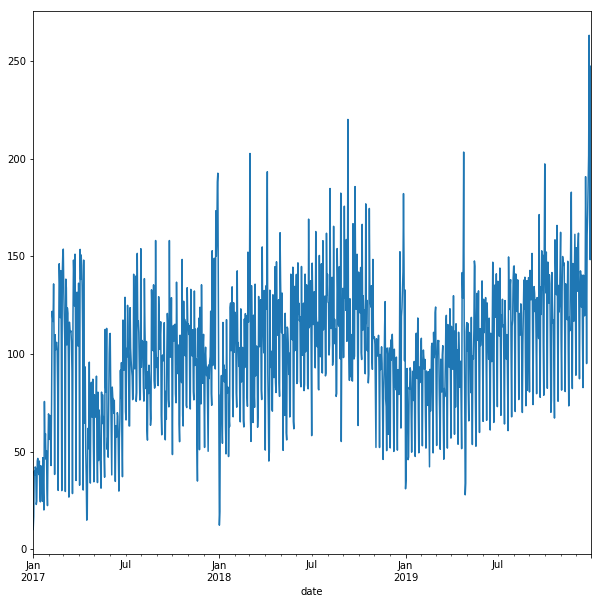

In [17]:
df.resample('D')['amt'].sum().plot(figsize=(10,10));

see what statsmodels say about trend, etc

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [20]:
def analyse_atm_agg_values(dataframe, by='D', target='amt'):
    y = dataframe.resample(by)[target].sum()
    dec = sd(y, model='additive')
    f,ax = plt.subplots(4, figsize =(20,8))
    ax[0].plot(dec.observed)
    ax[1].plot(dec.trend)
    ax[2].plot(dec.seasonal)
    ax[3].plot(dec.resid);

We show the following 4 plots:
    - Observed: original sequence
    - Trend: time trend
    - Seasonal: seasonal trend
    - Residual: the noise

### Day

we have spikes in new year month

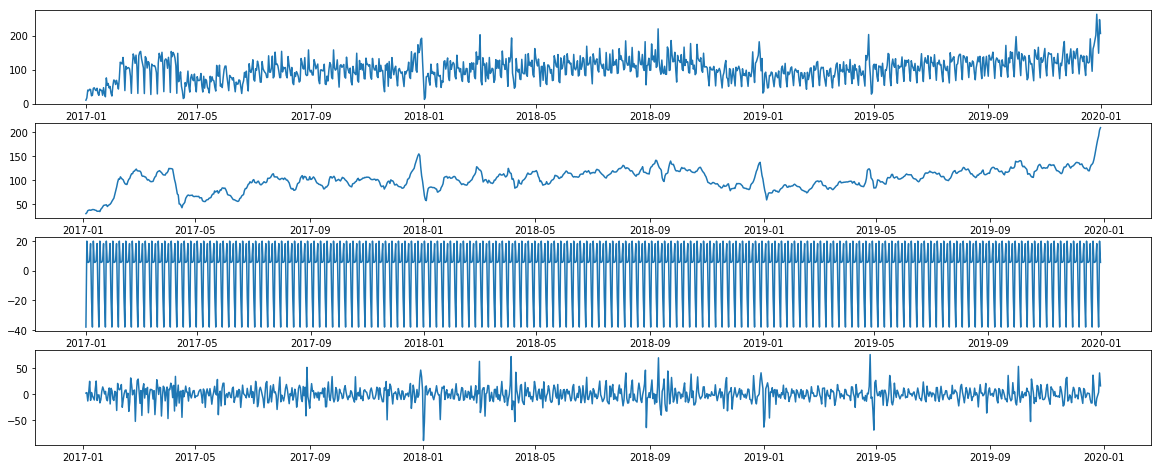

In [21]:
analyse_atm_agg_values(df, by='D', target='amt')

### Week

Trend is mostly increasing

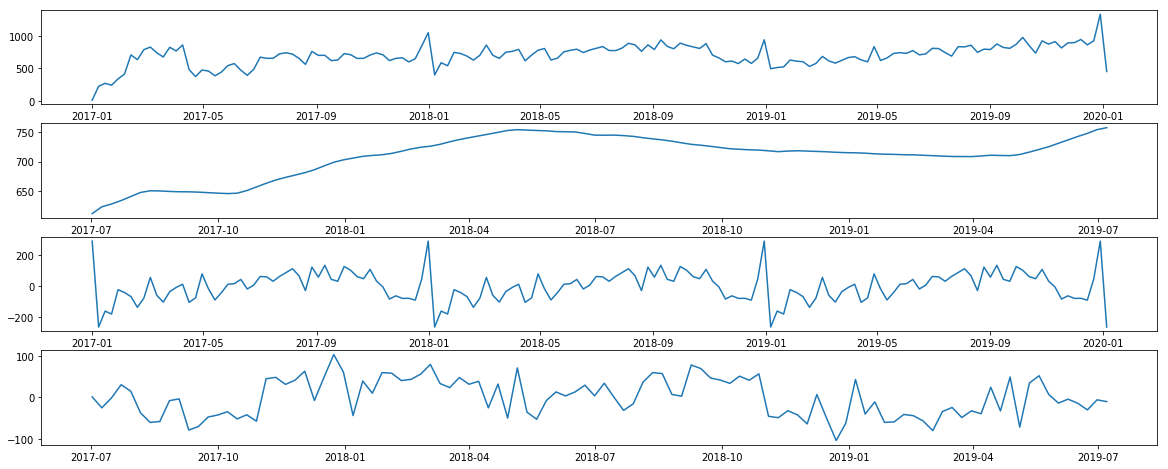

In [22]:
analyse_atm_agg_values(df, by='W', target='amt')

### Month

Trend is mostly increasing

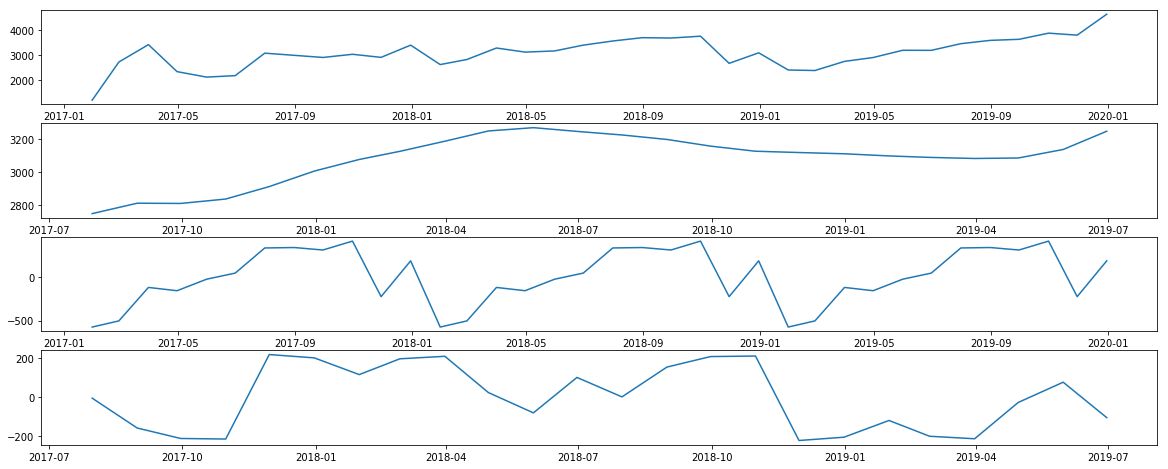

In [23]:
analyse_atm_agg_values(df, by='M', target='amt')

### Year

We have high increasing trend untill the start of 2019 year, then it becomes low (but still increasing) 

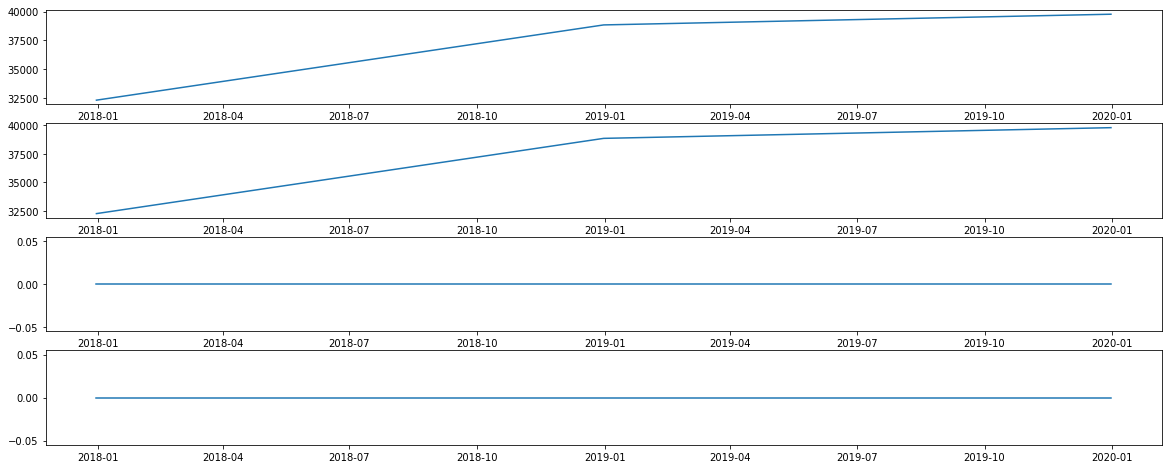

In [24]:
analyse_atm_agg_values(df, by='Y', target='amt')

## Plot time series data for each ID

We plot time series data per ID to check if they follow the same pattern

In [25]:
random_ids = df.id.sample(50, random_state=0).values

In [26]:
random_ids

array([ 558,  121,  588,  430,  804,    5, 1009,  869,  480,  166,  569,
        138,  732,   63,   73,  333, 1160,  435, 1057,   18,  584,  443,
        329,  606,  343,  874, 1099,   97,   45,  730,  756, 1115,  669,
       1140,  943,  538, 1106,  810,  975, 1176,  343,  261,  465,  206,
        717,  165,  206,  707, 1199,  358])

In [27]:
_df_grouped_by_random_ids = df[df.id.apply(lambda x: x in random_ids)].groupby('id')['amt'].resample('D').sum().unstack()

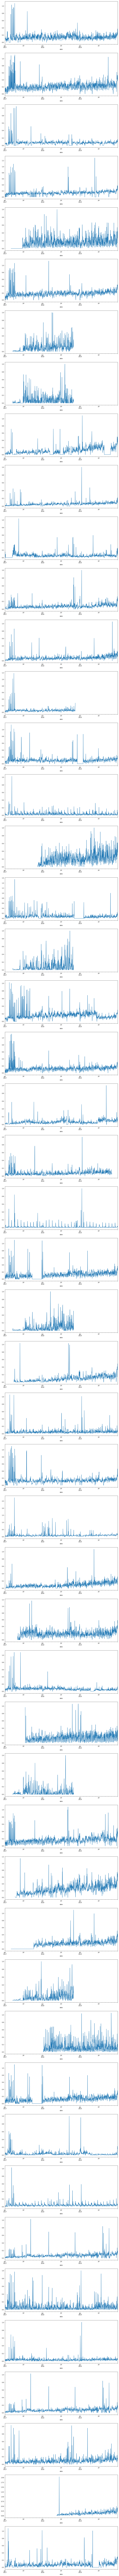

In [28]:
fig, axes = plt.subplots(nrows=len(random_ids), ncols=1, figsize=(15, 7*len(random_ids)))
for _id, _ax in zip(random_ids, axes):
    _df_grouped_by_random_ids.loc[_id, :].plot(ax=_ax)

We have different targets for each ATM ID. Some of them are stationary, others have global trend. It's possible to group ID's by some target properties and use given group ID's as Labels.